
# Project: Energy consumption in three decades

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

For our analysis, we have chosen a dataset from [Gapminder](https://www.gapminder.org/data/) about energy consumption. We have downloaded a raw data of all the countries on their **consumption of oil, coal, nuclear and hydro consumption**. We have included in our dataset the average **income** of each person in a country, the **CO2 emission** and the **democratic scrore**. 
Data uploaded is totally in a raw, we will choose from each dateset three years , which represents the end of each decade to construct three datasets. In our analysis, we will try to answer the following questions: Which countries make mmore emission, the richest, the democtratic, the richer? Which kind of energy consumption leads to less carbon emission? From one decade to another, do CO2 emission decrease or increase?

In [1]:
# package initialization
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import th raw data and making them in a dictionary
oil = pd.read_csv("oil.csv")
emission = pd.read_csv("co2_emissions.csv")
democracy = pd.read_csv("democracy_score.csv")
electricity = pd.read_csv("electricity.csv")
energy = pd.read_csv("energy_total.csv")
hydro = pd.read_csv("hydro.csv")
income = pd.read_csv("income.csv")
nuclear = pd.read_csv("nuclear_power.csv")
data = {"oil" : oil, "emission" : emission, "democracy" : democracy, "electricity" : electricity, "energy" : energy, "hydro" : hydro,
"income" : income, "nuclear" : nuclear}

In [3]:
# we initilize a dataframe using the largest country list
df_89 = pd.DataFrame(data["income"].country)
df_99 = pd.DataFrame(data["income"].country)
df_09 = pd.DataFrame(data["income"].country)

for key in data.keys():
    df_89 = pd.merge(df_89, data[key][["country","1989"]], on = "country", how="inner")
    df_89 = df_89.rename(columns=lambda x: key if x in ["1989_x","1989_y", "1989"] else x)
    df_99 = pd.merge(df_99, data[key][["country","1999"]], on = "country", how="inner")
    df_99 = df_99.rename(columns=lambda x: key if x in ["1999_x","1999_y", "1999"] else x)
    df_09 = pd.merge(df_09, data[key][["country","2009"]], on = "country", how="inner")
    df_09 = df_09.rename(columns=lambda x: key if x in ["2009_x","2009_y", "2009"] else x)


In [4]:
df_09.head()

,country,oil,emission,democracy,electricity,energy,hydro,income,nuclear
0,Argentina,24.3M,4.42,8,122B,80.8k,2.91M,21.5k,702k
1,Australia,42M,18.80,10,250B,311k,945k,44.6k,0
2,Austria,12.2M,8.10,10,69.1B,11.4k,3.52M,51k,0
3,Azerbaijan,3.31M,3.57,−7,18.9B,64.6k,199k,13.6k,0
4,Belgium,32M,9.93,8,91.2B,15.3k,28.2k,47.1k,4.06M


In [5]:
df_99.head()

,country,oil,emission,democracy,electricity,energy,hydro,income,nuclear
0,Argentina,20.1M,4.02,8,80.7B,80.1k,1.84M,19k,611k
1,Australia,38.8M,18.30,10,207B,214k,1.39M,37.2k,0
2,Austria,12.1M,8.17,10,60.4B,9720,3.5M,45.1k,0
3,Azerbaijan,5.73M,3.55,−7,18.2B,19k,130k,3630,0
4,Belgium,30.3M,12.20,10,84.5B,13.9k,29.3k,41.6k,4.21M


In [6]:
df_89.head()

,country,oil,emission,democracy,electricity,energy,hydro,income,nuclear
0,Argentina,20.9M,3.64,7,50.9B,47.2k,1.11M,14.3k,433k
1,Australia,32.7M,16.60,10,151B,145k,1.24M,31.1k,0
2,Austria,10.4M,6.99,10,50.2B,8620,3.03M,36.1k,0
3,Azerbaijan,8.14M,7.76,−4,23.3B,NaN,NaN,8710,NaN
4,Belgium,22.7M,10.70,10,67.5B,13k,26.2k,34.5k,3.54M


In [7]:
df_89.shape

(67, 9)

In [8]:
df_99.shape

(67, 9)

In [9]:
df_09.shape

(67, 9)

<a id='wrangling'></a>
## Data Wrangling

We will first check if the data is of type integer or float, then we will check for null values and duplicates. 

### General Properties

In [10]:
# inspect elements of the data
df_09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      67 non-null     object 
 1   oil          67 non-null     object 
 2   emission     67 non-null     float64
 3   democracy    67 non-null     object 
 4   electricity  67 non-null     object 
 5   energy       67 non-null     object 
 6   hydro        67 non-null     object 
 7   income       67 non-null     object 
 8   nuclear      67 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.2+ KB


In [12]:
df_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      67 non-null     object 
 1   oil          67 non-null     object 
 2   emission     67 non-null     float64
 3   democracy    67 non-null     object 
 4   electricity  67 non-null     object 
 5   energy       67 non-null     object 
 6   hydro        67 non-null     object 
 7   income       67 non-null     object 
 8   nuclear      67 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.2+ KB


In [13]:
df_89.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      67 non-null     object 
 1   oil          64 non-null     object 
 2   emission     67 non-null     float64
 3   democracy    67 non-null     object 
 4   electricity  64 non-null     object 
 5   energy       54 non-null     object 
 6   hydro        54 non-null     object 
 7   income       67 non-null     object 
 8   nuclear      54 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.2+ KB


> Conclusion about the data types: in all the data extracted, data must be in float or integer type except for the countries column. We have inspected that ***oil, democracy, electricity, energy, hydro, income and nuclear*** is extracted in string type. Therfore, we will build a function to transform the data into integer and float.
We transform data to the following types:

| Column | Type_of_data |
|--------|---------------|
|***country***| string |
|***oil***|integer|
|***emission***|float|
|***democracy***|integer|
|***electricity***|float|
|***energy***|integer|
|***hydro***| integer |
|***income***| integer |
|***nuclear***| integer |

In [14]:
# Convert the data using the conv_data from sting to integer
def conv_data(df):
    for noun in df.columns:
        if df[noun].dtypes == 'O':
            if  ((df[noun].str.contains('[0-9]B$|[0-9]TR$')).all() == True) and (df[noun].dtypes == 'O'):
                df[noun] = df[noun].dropna().replace({"k":"*1e3", "M":"*1e6", "B" : "*1e9", "TR" : "*1e12"}, regex=True).map(pd.eval).astype(float)
                continue
            elif  ((df[noun].str.contains('[0-9]M$|[0-9]B$|[0-9]k$')).any() == True):
                df[noun] = df[noun].dropna().replace({"k":"*1e3", "M":"*1e6", "B" : "*1e9", "TR" : "*1e12"}, regex=True).map(pd.eval).astype(int)
                continue
            elif ((df[noun].str.contains('^−[0-9]')).any() == True) :
                df[noun] = df[noun].dropna().replace("−", "-", regex=True).map(pd.eval).astype(int)
            else :
                pass
        else :
            pass
    return df

In [15]:
df_89 = conv_data(df_89)
df_09 = conv_data(df_09)
df_99 = conv_data(df_99)

In [16]:
# to check the new datasets
df_09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      67 non-null     object 
 1   oil          67 non-null     int32  
 2   emission     67 non-null     float64
 3   democracy    67 non-null     int32  
 4   electricity  67 non-null     float64
 5   energy       67 non-null     int32  
 6   hydro        67 non-null     int32  
 7   income       67 non-null     int32  
 8   nuclear      67 non-null     int32  
dtypes: float64(2), int32(6), object(1)
memory usage: 3.7+ KB


In [17]:
df_09.describe()

,oil,emission,democracy,electricity,energy,hydro,income,nuclear
count,6.700000e+01,67.000000,67.000000,6.700000e+01,6.700000e+01,6.700000e+01,67.000000,6.700000e+01
mean,5.026521e+07,6.457373,5.985075,2.817578e+11,1.528369e+05,3.819148e+06,25187.014925,3.404403e+06
std,1.106378e+08,3.988242,5.945440,6.909473e+11,3.520549e+05,8.887707e+06,16226.549888,1.022812e+07
min,9.690000e+05,0.337000,-9.000000,5.570000e+09,7.820000e+02,2.580000e+02,2760.000000,0.000000e+00
25%,8.250000e+06,3.605000,5.000000,3.680000e+10,1.120000e+04,2.150000e+05,11550.000000,0.000000e+00
50%,1.420000e+07,6.120000,9.000000,7.870000e+10,4.090000e+04,7.930000e+05,21500.000000,0.000000e+00
75%,4.485000e+07,9.075000,10.000000,2.085000e+11,1.285000e+05,2.745000e+06,37450.000000,1.465000e+06
max,8.010000e+08,18.800000,10.000000,4.210000e+12,2.080000e+06,5.290000e+07,64400.000000,7.140000e+07


In [18]:
df_99.describe()

,oil,emission,democracy,electricity,energy,hydro,income,nuclear
count,6.700000e+01,67.000000,67.000000,6.700000e+01,6.700000e+01,6.700000e+01,67.000000,6.700000e+01
mean,4.740439e+07,6.452687,5.552239,2.088758e+11,1.226604e+05,2.996556e+06,20227.014925,3.196512e+06
std,1.130795e+08,4.377029,6.189638,5.223428e+11,2.658054e+05,6.027645e+06,15496.917584,9.742793e+06
min,9.340000e+05,0.200000,-9.000000,4.110000e+09,6.010000e+02,3.440000e+02,1880.000000,0.000000e+00
25%,7.340000e+06,3.175000,4.000000,2.565000e+10,9.625000e+03,1.375000e+05,7910.000000,0.000000e+00
50%,1.320000e+07,6.060000,8.000000,6.470000e+10,3.060000e+04,6.270000e+05,15000.000000,0.000000e+00
75%,3.950000e+07,8.710000,10.000000,1.635000e+11,1.290000e+05,2.395000e+06,34300.000000,1.180000e+06
max,8.700000e+08,20.900000,10.000000,3.940000e+12,1.670000e+06,2.970000e+07,57400.000000,6.640000e+07


In [19]:
df_89.describe()

,oil,emission,democracy,electricity,energy,hydro,income,nuclear
count,6.400000e+01,67.000000,67.000000,6.400000e+01,5.400000e+01,5.400000e+01,67.000000,5.400000e+01
mean,4.431359e+07,7.046000,3.059701,1.719648e+11,1.081483e+05,2.712291e+06,18092.686567,2.696159e+06
std,1.056291e+08,4.992937,6.914808,4.280847e+11,2.463897e+05,5.223637e+06,12508.868682,7.823402e+06
min,1.200000e+06,0.133000,-9.000000,2.860000e+09,3.910000e+02,2.580000e+02,1450.000000,0.000000e+00
25%,8.565000e+06,2.730000,-4.000000,2.375000e+10,1.097500e+04,2.257500e+05,8200.000000,0.000000e+00
50%,1.495000e+07,6.990000,6.000000,5.055000e+10,3.380000e+04,7.525000e+05,14400.000000,0.000000e+00
75%,3.620000e+07,9.960000,10.000000,1.435000e+11,1.145000e+05,2.240000e+06,27300.000000,1.160000e+06
max,7.860000e+08,19.800000,10.000000,3.160000e+12,1.620000e+06,2.510000e+07,54900.000000,4.830000e+07


We pass to the null values check. For the purpose of keeping all the countries in our dataset, we replace na values with zero.

In [20]:
# check na values data for the 2009 data
df_09.isna().sum()

country        0
oil            0
emission       0
democracy      0
electricity    0
energy         0
hydro          0
income         0
nuclear        0
dtype: int64

In [21]:
# check na values data for the 1999 data
df_99.isna().sum()

country        0
oil            0
emission       0
democracy      0
electricity    0
energy         0
hydro          0
income         0
nuclear        0
dtype: int64

In [22]:
# check na values data for the 1989 data
df_89.isna().sum()

country         0
oil             3
emission        0
democracy       0
electricity     3
energy         13
hydro          13
income          0
nuclear        13
dtype: int64

We have detected only na values for the 1989 data. Then, we will replace them with zeros. 

In [23]:
# replace with na zeros an check
df_89 = df_89.replace(np.nan, 0)
df_89.isna().sum()

country        0
oil            0
emission       0
democracy      0
electricity    0
energy         0
hydro          0
income         0
nuclear        0
dtype: int64

Income and dmocracy could not give enough information that we could use to analyze democraticy and income influence on the consumption of energy and the contribution for the pollution. Then we will create another column for democracy and Income. We creta four categories of classification for the countries according to the [Word Bank](https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2021-2022) classification, and we add 600 dollar to adjust it to inflation:

|***Group***|***income***|
|-----|------|
|Low Income| less or equal then 1645$|
|Low-Middle Income|1646$-4695$|
|Upper-Middle Income|4646$-13135$|
|High Income| More or equal the 13136$|

We create another indicator for the democracy using for the democracy when we classify it to four category according to the folowing table: 

|***Group***|***scroe***|
|-----|------|
| Dictatorship | (-5) or less|
|Close to dictatorship| (-4) - 0|
|In the path to democratic|0-4|
|democracy| more or equalthan 5|

In [24]:
# create a function for income and for democracy
def to_income(df, col_name = "") :
    # create a list of our conditions
    conditions = [
        (df[col_name] <= 1645),
        (df[col_name] > 1645) & (df[col_name] <= 4695),
        (df[col_name] > 4695) & (df[col_name] <= 13135),
        (df[col_name] >= 13136)
        ]

    # create a list of the values we want to assign for each condition
    values = ['Low Income', 'Low-Middle Income', 'Upper-Middle Income', 'High Income']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['income'] = np.select(conditions, values)
    return df
def to_demo(df, col_name = "") :
    # create a list of our conditions
    conditions = [
        (df[col_name] <= -5),
        (df[col_name] > -5) & (df[col_name] <= 0),
        (df[col_name] > 0) & (df[col_name] <= 5),
        (df[col_name] >= 6)
        ]

    # create a list of the values we want to assign for each condition
    values = ['Dictatorship', 'Close to dictatorship', 'In the path to democracy', 'democratic']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['democracy'] = np.select(conditions, values)
    return df

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Democracy and developement of the countries

In our first question we will try to see the evolution of the countries at the end of each decade. Do more countries improved toward more freedom and income? And how much countries within each category of income is democratic?

In [25]:
# Transform the income and emocracy column
df_09 = to_demo(df_09, "democracy")
df_89 = to_demo(df_89, "democracy")
df_99 = to_demo(df_99, "democracy")
df_09 = to_income(df_09, "income")
df_89 = to_income(df_89, "income")
df_99 = to_income(df_99, "income")

After the transformation of the columns, we can go through the analysis of the data, and about the improvement of the gloab 67 countries included in our sample.

([<matplotlib.patches.Wedge at 0x185071e2bf0>,
 [Text(-0.6297599246706812, 0.9018882620806072, 'Close to dictatorship'),
  Text(-1.0493038301319972, -0.33009312636030586, 'Dictatorship'),
  Text(-0.35460072500704176, -1.0412772569419158, 'In the path to democracy'),
  Text(1.0996977041252858, -0.025786809449321227, 'democratic')])

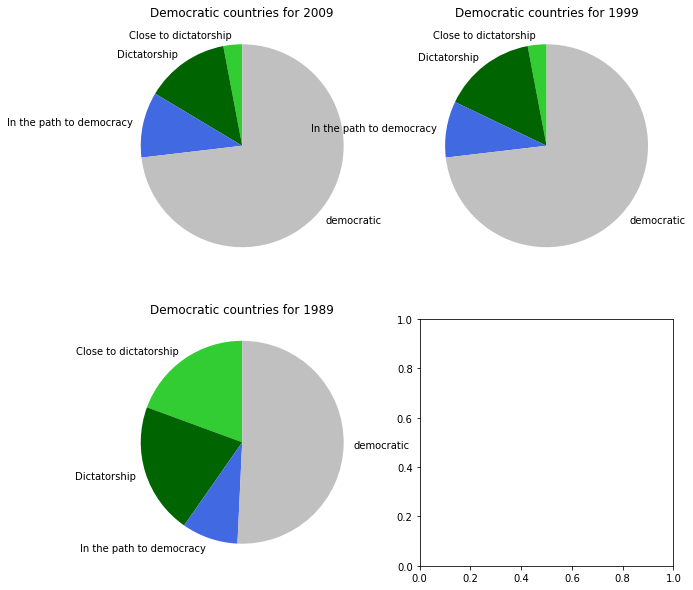

In [26]:
# make a plot of the evolution of the democratic countries
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
lu_09 = list(df_09.groupby(["democracy"])["country"].groups.keys())
lul_09 = list(df_09.groupby(["democracy"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Democratic countries for 2009")
ax1.pie(lul_09, labels=lu_09, colors=colors, startangle=90)

lu_99 = list(df_99.groupby(["democracy"])["country"].groups.keys())
lul_99 = list(df_99.groupby(["democracy"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#ax2.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Democratic countries for 1999")
ax2.pie(lul_99, labels=lu_99, colors=colors, startangle=90)

lu_89 = list(df_89.groupby(["democracy"])["country"].groups.keys())
lul_89 = list(df_89.groupby(["democracy"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#plt.subplot(2, 1, 2)
ax3.axis("equal")
ax3.set_title("Democratic countries for 1989")
ax3.pie(lul_89, labels=lu_89, colors=colors, startangle=90)

The number of democratic countries have seen an evolution from the end of the 80s decade with 34 countries, to 48 countries in the end of 2009

([<matplotlib.patches.Wedge at 0x1850738b730>,
 [Text(-1.0756035858167015, -0.23038430106726923, 'High Income'),
  Text(0.5867942214636925, -0.930415252270092, 'Low Income'),
  Text(0.9439155556430987, -0.5648215858259849, 'Low-Middle Income'),
  Text(0.8554012568374544, 0.6915841885127967, 'Upper-Middle Income')])

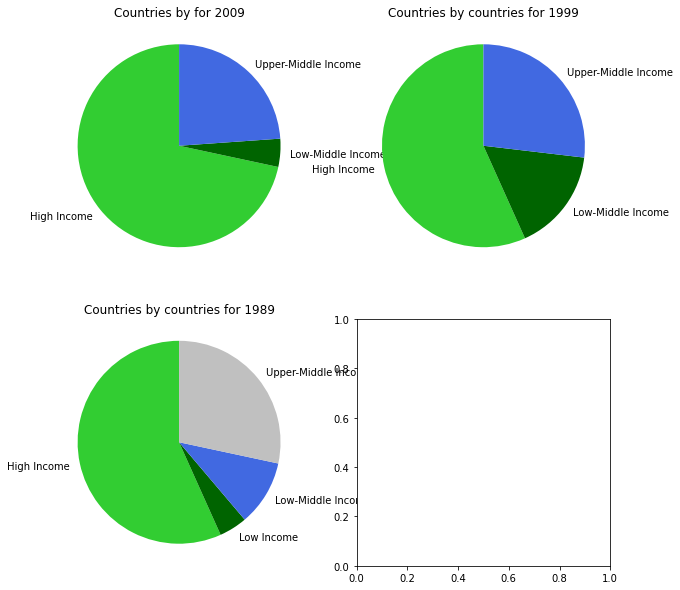

In [27]:
# make a plot of the evolution of the countries by income
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
lu_09 = list(df_09.groupby(["income"])["country"].groups.keys())
lul_09 = list(df_09.groupby(["income"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Countries by for 2009")
ax1.pie(lul_09, labels=lu_09, colors=colors, startangle=90)

lu_99 = list(df_99.groupby(["income"])["country"].groups.keys())
lul_99 = list(df_99.groupby(["income"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#ax2.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Countries by countries for 1999")
ax2.pie(lul_99, labels=lu_99, colors=colors, startangle=90)

lu_89 = list(df_89.groupby(["income"])["country"].groups.keys())
lul_89 = list(df_89.groupby(["income"])["country"].count())
colors = ["limegreen", 'darkgreen', "royalblue", "silver"]
#plt.subplot(2, 1, 2)
ax3.axis("equal")
ax3.set_title("Countries by countries for 1989")
ax3.pie(lul_89, labels=lu_89, colors=colors, startangle=90)

The number of countries with high income have jumped in twenty years from 38 in the end of the 80s decade to 48 in the edge of the first decade for the 21st century. The number of low income countries in our data of 67 countries have vanished in the last decate of the 20th century.

<AxesSubplot:title={'center':'1989 democracy and income'}, xlabel='democracy'>

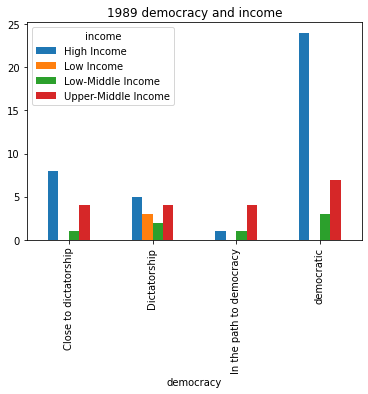

In [28]:
# plot the number of countries according to income and democracy in 1989
pd.crosstab(df_89['democracy'],df_89['income']).plot.bar(title = "1989 democracy and income")

<AxesSubplot:title={'center':'1999 democracy and income'}, xlabel='democracy'>

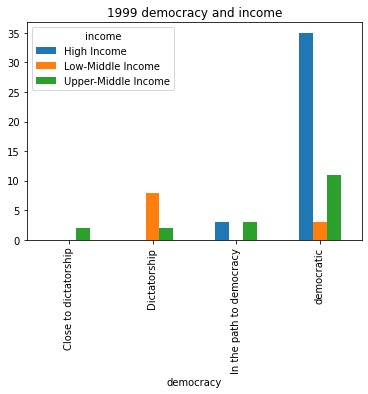

In [29]:
# plot the number of countries according to income and democracy in 1999
from matplotlib.pyplot import title
pd.crosstab(df_99['democracy'],df_99['income']).plot.bar(title = "1999 democracy and income")

<AxesSubplot:title={'center':'2009 democracy and income'}, xlabel='democracy'>

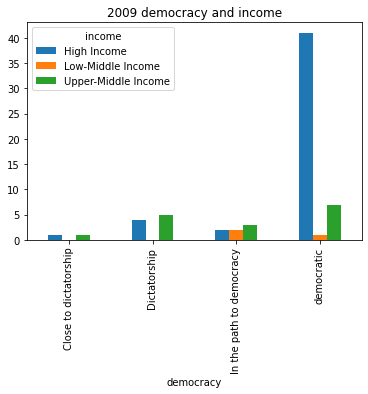

In [30]:
# plot the number of countries according to income and democracy in 2009
pd.crosstab(df_09['democracy'],df_09['income']).plot.bar(title='2009 democracy and income')

The number of democratic countries with high income have raised massively in the last two decades. It could explain that countries whcih emerged to democracy have made more favorable economy for higher income.

In [31]:
# plot a table to show the dmocracy rlation with invome in 2009
pd.crosstab(df_09['democracy'],df_09['income'])

income,High Income,Low-Middle Income,Upper-Middle Income
democracy,,,
Close to dictatorship,1,0,1
Dictatorship,4,0,5
In the path to democracy,2,2,3
democratic,41,1,7


In [89]:
# plot a table to show the dmocracy rlation with invome in 1989
pd.crosstab(df_89['democracy'],df_89['income'])

income,High Income,Low Income,Low-Middle Income,Upper-Middle Income
democracy,,,,
Close to dictatorship,8,0,1,4
Dictatorship,5,3,2,4
In the path to democracy,1,0,1,4
democratic,24,0,3,7


> ***Conclusion*** : Countries with high income tends to be more democratic after the end of the 80s decade. This merge toward dimocracy is due to the globalization in part and to many other factors that could be investigated. In the other, two parts, we will try to investigate if the countries with higher development indexes (`democracy`,`income`) are more aware about the climate change. Otherwise, we will try to link the emission to the different sources of energy consumption.

### Research Question 2  gas emission and Countries development indexes

We try in this second part to see the relation sheep between pollution and dvelopemnt indexes which are income and democracy. 

In [426]:
# the energy consumption and air pollution by the both development indexes in 1999
df_99.groupby(["income", "democracy"]).sum()

oil  emission  \
income              democracy                                          
High Income         In the path to democracy  1.527300e+08    19.400   
                    democratic                2.257060e+09   318.380   
Low-Middle Income   Dictatorship              2.757200e+08    25.129   
                    democratic                1.223700e+08     2.054   
Upper-Middle Income Close to dictatorship     1.512000e+07    10.200   
                    Dictatorship              3.578000e+07     7.600   
                    In the path to democracy  7.605000e+07     7.437   
                    democratic                2.412640e+08    42.130   

                                               electricity   energy  \
income              democracy                                         
High Income         In the path to democracy  9.272000e+11  1038400   
                    democratic                9.683970e+12  4082511   
Low-Middle Income   Dictatorship              1.438960e+12  1382615   
                    democratic                6.028000e+11   392100   
Upper-Middle Income Close to dictatorship     7.210000e+10   202600   
                    Dictatorship              9.220000e+10    62810   
                    In the path to democracy  1.352800e+11   271080   
                    democratic                1.042170e+12   786130   

                                                  hydro    nuclear  
income              democracy                                       
High Income         In the path to democracy   15014000   10500000  
                    democratic                119852894  191763000  
Low-Middle Income   Dictatorship               21082330    1314300  
                    democratic                  7695600    1140000  
Upper-Middle Income Close to dictatorship        544400          0  
                    Dictatorship                1261630          0  
                    In the path to democracy    2034000          0  
                    democratic                 33284400    9449000

In [90]:
# the energy consumption and air pollution by the both development indexes in 2009
df_09.groupby(["income", "democracy"]).sum()

oil  emission  \
income              democracy                                          
High Income         Close to dictatorship     3.420000e+07     6.430   
                    Dictatorship              1.128800e+08    30.650   
                    In the path to democracy  1.735000e+08    14.340   
                    democratic                2.247760e+09   327.170   
Low-Middle Income   In the path to democracy  2.422000e+07     1.222   
                    democratic                1.540000e+08     1.410   
Upper-Middle Income Close to dictatorship     3.440000e+07     2.500   
                    Dictatorship              4.255000e+08    22.560   
                    In the path to democracy  4.940000e+07     9.370   
                    democratic                1.119090e+08    16.992   

                                               electricity   energy  \
income              democracy                                         
High Income         Close to dictatorship     1.250000e+11   204000   
                    Dictatorship              3.500000e+11   564649   
                    In the path to democracy  1.139000e+12  1241700   
                    democratic                1.162685e+13  4417140   
Low-Middle Income   In the path to democracy  1.360000e+11    89700   
                    democratic                8.800000e+11   503000   
Upper-Middle Income Close to dictatorship     1.340000e+11    88200   
                    Dictatorship              3.878400e+12  2258982   
                    In the path to democracy  1.027000e+11   299300   
                    democratic                5.058200e+11   573400   

                                                  hydro    nuclear  
income              democracy                                       
High Income         Close to dictatorship       7390000          0  
                    Dictatorship                1416780          0  
                    In the path to democracy   15615000   14100000  
                    democratic                152721600  198985999  
Low-Middle Income   In the path to democracy    2553000     249000  
                    democratic                  8960000    1600000  
Upper-Middle Income Close to dictatorship       1110000          0  
                    Dictatorship               56503258    6030000  
                    In the path to democracy    1097300          0  
                    democratic                  8516000    7130000

In [91]:
# the energy consumption and air pollution by the both development indexes in 1989
df_89.groupby(["income", "democracy"]).sum()

oil  emission  \
income              democracy                                          
High Income         Close to dictatorship     4.335400e+08    92.500   
                    Dictatorship              2.585000e+07    49.420   
                    In the path to democracy  8.930000e+06     7.300   
                    democratic                1.785000e+09   217.800   
Low Income          Dictatorship              1.183700e+08     2.454   
Low-Middle Income   Close to dictatorship     1.330000e+07     5.900   
                    Dictatorship              3.286000e+07     1.679   
                    In the path to democracy  1.200000e+06     0.202   
                    democratic                7.700000e+07     1.897   
Upper-Middle Income Close to dictatorship     4.712000e+07    35.040   
                    Dictatorship              8.530000e+07    16.220   
                    In the path to democracy  6.090000e+07    24.950   
                    democratic                1.467000e+08    16.720   

                                               electricity     energy  \
income              democracy                                           
High Income         Close to dictatorship     1.713200e+12   240800.0   
                    Dictatorship              1.335000e+11    57920.0   
                    In the path to democracy  2.960000e+10    16100.0   
                    democratic                7.066200e+12  3148111.0   
Low Income          Dictatorship              5.999000e+11   892400.0   
Low-Middle Income   Close to dictatorship     5.590000e+10        0.0   
                    Dictatorship              3.752000e+10   149758.0   
                    In the path to democracy  2.860000e+09     4180.0   
                    democratic                3.404000e+11   332100.0   
Upper-Middle Income Close to dictatorship     9.160000e+10    94800.0   
                    Dictatorship              1.159000e+11   361600.0   
                    In the path to democracy  3.669000e+11   308400.0   
                    democratic                4.522700e+11   233840.0   

                                                   hydro      nuclear  
income              democracy                                          
High Income         Close to dictatorship      3269999.0      32000.0  
                    Dictatorship                541000.0    3360000.0  
                    In the path to democracy     13600.0    1190000.0  
                    democratic                96642118.0  135429000.0  
Low Income          Dictatorship              10609100.0          0.0  
Low-Middle Income   Close to dictatorship            0.0          0.0  
                    Dictatorship                674500.0          0.0  
                    In the path to democracy    241000.0          0.0  
                    democratic                 7358000.0     400580.0  
Upper-Middle Income Close to dictatorship        19400.0          0.0  
                    Dictatorship               1729000.0          0.0  
                    In the path to democracy   1305000.0     954000.0  
                    democratic                24061000.0    4227000.0

In [93]:
# total emission by each category in 1999
df_99.groupby(["income", "democracy"])["emission"].sum()

income               democracy               
High Income          In the path to democracy     19.400
                     democratic                  318.380
Low-Middle Income    Dictatorship                 25.129
                     democratic                    2.054
Upper-Middle Income  Close to dictatorship        10.200
                     Dictatorship                  7.600
                     In the path to democracy      7.437
                     democratic                   42.130
Name: emission, dtype: float64

In [96]:
# total emission by each category in 2009
df_09.groupby(["income", "democracy"])["emission"].sum()

income               democracy               
High Income          Close to dictatorship         6.430
                     Dictatorship                 30.650
                     In the path to democracy     14.340
                     democratic                  327.170
Low-Middle Income    In the path to democracy      1.222
                     democratic                    1.410
Upper-Middle Income  Close to dictatorship         2.500
                     Dictatorship                 22.560
                     In the path to democracy      9.370
                     democratic                   16.992
Name: emission, dtype: float64

In [97]:
# total emission by each category in 1989
df_89.groupby(["income", "democracy"])["emission"].sum()

income               democracy               
High Income          Close to dictatorship        92.500
                     Dictatorship                 49.420
                     In the path to democracy      7.300
                     democratic                  217.800
Low Income           Dictatorship                  2.454
Low-Middle Income    Close to dictatorship         5.900
                     Dictatorship                  1.679
                     In the path to democracy      0.202
                     democratic                    1.897
Upper-Middle Income  Close to dictatorship        35.040
                     Dictatorship                 16.220
                     In the path to democracy     24.950
                     democratic                   16.720
Name: emission, dtype: float64

> ***Conclusion*** : Countries with more favorable dvelopment indexes tends to contribute more in the emission of the CO2 gas. In the 1989, countries whose are responsible for the emission where divided into different categories. While in the 2009, emission of polluted gas is more concentrated in the more advanced countries in term of income and democracy. 

The countries with high income, and which are democratic, persist in all the periods. They hold the highest emission rate over the two deacdes. 

### Question 3: energy consumption and energy

> The nergy consumed in our daily routine comes from different sources. And, those consumption leads to many kind of emissions that could hurt the climate of the earth. Early, we have discovered that more democratic countries and high income countries are more responsible for the emission of CO2. In, this part we will compare the energy consumption in both countries with high emission and low emission. 

In [103]:
# choose the countries with emission greater than the mean
top_emission_09 = df_09.query('emission > emission.mean()')
top_emission_99 = df_99.query('emission > emission.mean()')
top_emission_89 = df_89.query('emission > emission.mean()')

In [104]:
# choose the countries with emission less than the mean
flop_emission_09 = df_09.query('emission < emission.mean()')
flop_emission_99 = df_99.query('emission < emission.mean()')
flop_emission_89 = df_89.query('emission < emission.mean()')

In [100]:
def conv_by_sum(df, df2):
    list_for_mean = list(flop_emission_09.mean().keys())
    for nou in list_for_mean :
        df[nou] = df[nou].div(df2[nou].sum(), axis = 0)
    return df

In [112]:
top_emission_09 = conv_by_sum(top_emission_09, df_09)
top_emission_89 = conv_by_sum(top_emission_89, df_89)
top_emission_99 = conv_by_sum(top_emission_99, df_99)
flop_emission_09 = conv_by_sum(flop_emission_09, df_09)
flop_emission_89 = conv_by_sum(flop_emission_89, df_89)
flop_emission_99 = conv_by_sum(flop_emission_99, df_99)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\4128474324.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_for_mean = list(flop_emission_09.mean().keys())
C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\4128474324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nou] = df[nou].div(df2[nou].sum(), axis = 0)


C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\2436415413.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_col = list(ticker.mean().keys())
C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\2436415413.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_col = list(ticker.mean().keys())
C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\2436415413.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  list_col = list(ticker.mean().keys())
C:\Users\Dell\AppData\Local\Temp\ipyk

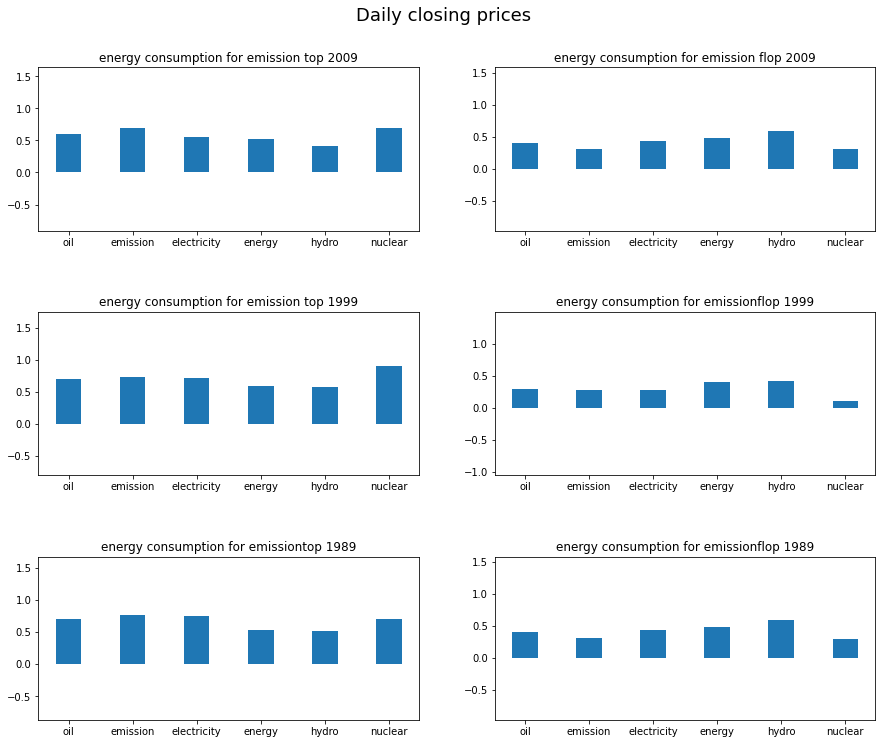

In [137]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)
tickers = [top_emission_09,flop_emission_09, top_emission_99, flop_emission_99,top_emission_89, flop_emission_09]
year = [" top 2009", " flop 2009", " top 1999","flop 1999", "top 1989", "flop 1989"]
 
# loop through tickers and axes
for ticker, ax, yr in zip(tickers, axs.ravel(), year):
    # filter df for ticker and plot on specified axes
    list_col = list(ticker.mean().keys())
    list_data = list(ticker[list_col].sum())

    # chart formatting
    ax.axis("equal")
    ax.set_title('energy consumption for emission' + yr)
    ax.bar(list_col, list_data, width=0.4)

plt.show()


> The countries with the less CO2 emission have more `hydro` consumption. In the other hand, the other energy consumtion like oil, electricity, and nuclear is related to the total emission. The sources of energy play an important role in limiting the emission of toxic gazes.

<a id='conclusion'></a>
## Conclusion

In [143]:
emi_high_in = top_emission_09.query('income == "High Income" and democracy == "democratic"')

C:\Users\Dell\AppData\Local\Temp\ipykernel_20456\2621040341.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  names = list(emi_high_in.mean().keys())


<AxesSubplot:>

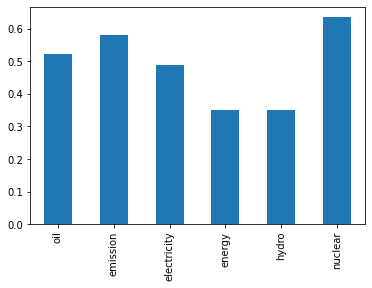

In [146]:
names = list(emi_high_in.mean().keys())
emi_high_in[names].sum().plot.bar()

Energy consumption in the high income and democratic countries is far away from the other countries which represents more than 50% of the gloab CO2 emission. The use of electricity, niclear power, and oil are favorable for emissions. The total energy consumed is around 37%.